In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [7]:
entry_data = pd.read_csv('./data/entry_data.csv')
sales_data = pd.read_csv('./data/sales_data.csv')
item_data = pd.read_csv('./data/item_data.csv')
item_entry_data = pd.read_csv('./data/item_entry_data.csv')

In [8]:
entry_data

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928
...,...,...,...,...,...,...,...,...
22550,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22551,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22552,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105
22553,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105


In [9]:
sales_data

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507
...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,"-3,500",NaN
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,"4,500",NaN
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,"-4,500",NaN
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,"4,000",NaN


In [10]:
item_data

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"
...,...,...,...,...
169,170,커피,카페모카(ICE),"2,500원"
170,171,커피,헤이즐넛라떼(ICE),"2,500원"
171,172,포장,오늘은 순살닭다리 덮밥,"9,000원"
172,173,포장,오늘은 한돈간장불고기,"8,000원"


In [11]:
item_entry_data

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"
5,6,한국대생,한국대생 요금제,"1,500원"
6,7,18시이후,거리두기4단계,"1,000원"
7,8,심야-조조,심야-조조 요금제,"2,500원"
8,9,일반인,일반요금제,"3,000원"
9,10,일반인,일반요금제,"7,000원"


필수문제1.월별 매출액 추세(sales_data를 이용합니다.)

In [12]:
temp_var = sales_data
temp_var['date'] = sales_data['결제일시'].str[:7]
temp_var['결제금액'] = temp_var['결제금액'].str.replace(',', '').astype('int64')
temp_var

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,2022-04
...,...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,-3500,NaN,2021-02
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,4500,NaN,2021-02
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,-4500,NaN,2021-02
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,4000,NaN,2021-02


In [13]:
grouped = temp_var['결제금액'].groupby(temp_var['date']).sum()
grouped

date
2021-02       7000
2021-03    2104500
2021-04    3116600
2021-05    2537000
2021-06    3621500
2021-07    1215000
2021-08    1229000
2021-09    1197500
2021-10    2138500
2021-11    2748500
2021-12    3290000
2022-01    1430500
2022-02    1181500
2022-03    1870900
2022-04      49900
Name: 결제금액, dtype: int64

/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_te

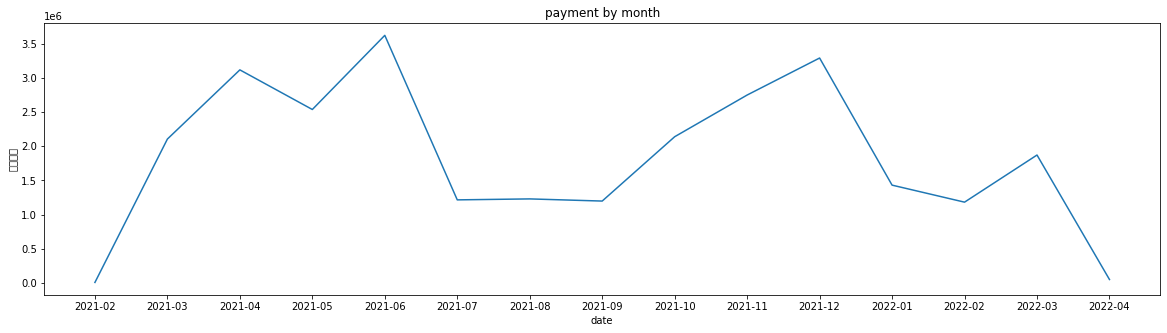

In [14]:
plt.figure(figsize = (20,5))
ax = sns.lineplot(data=grouped.reset_index(), x='date', y='결제금액')
plt.title('payment by month')
plt.show()

필수 문제2: 가장 인기 있는 음식/음료(salses_data를 이용합니다.)

In [17]:
# 판매수량 -1 빼내기
temp_var = temp_var[temp_var['판매수량'] != -1]

# top_goods에 상품명마다 내림차순 정렬
top_goods = temp_var['상품명'].value_counts().reset_index()
# column이름 변경
top_goods.columns=['상품명', '상품개수']

# 한국어 표시를 위한 설정
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

# 10개만 출력
top_goods_list = list(top_goods['상품명'])
top_goods_list

['김치볶음밥',
 '라면',
 '짜장라면',
 '치즈불고기볶음밥',
 '계란추가',
 '낙지볶음밥',
 '새우볶음밥',
 '아메리카노(ICE)',
 '치즈감자튀김',
 '감자튀김',
 '치즈추가',
 '초코머핀',
 '불닭볶음면',
 '만두라면',
 '아이스티',
 '쿠키(초코칩)',
 '2인라면',
 '쿠키(마카다미아)',
 '치즈케이크',
 '미니마카롱(3개)',
 '레몬에이드',
 '블루베리머핀',
 '카페모카(ICE)',
 '초코라떼(ICE)',
 '소떡소떡',
 '샷추가',
 '아메리카노(HOT)',
 '쿠키(오트밀)',
 '청귤에이드',
 '자몽에이드',
 '바닐라라떼(ICE)',
 '청귤차(ICE)',
 '2인짜장라면',
 '청귤차(HOT)',
 '허니밀크쉐이크',
 '(면)치즈추가',
 '치킨카라아케 6pc',
 '(면)계란후라이 추가-불닭/짜장',
 '카페라떼(ICE)',
 '맵단대패삼겹덮밥',
 '플레인요거트스무디',
 '블루베리스무디',
 '크로플',
 '쿠앤크쉐이크',
 '딸기스무디',
 '카페라떼(HOT)',
 '한돈고추장불고기덮밥',
 '단짠대패삼겹덮밥',
 '초코쉐이크',
 '바닐라라떼(HOT)',
 '한돈간장불고기덮밥',
 '헤이즐넛라떼(ICE)',
 '만두',
 '순살닭다리덮밥',
 '딸기라떼(ICE)',
 '2인불닭',
 '버팔로윙 6pc',
 '민트초코칩쉐이크',
 '레몬차(ICE)',
 '카모마일(ICE)',
 '초코라떼(HOT)',
 '유자차(HOT)',
 '카페모카(HOT)',
 '아포카토',
 '(면)계란추가-국물라면',
 '유자차(ICE)',
 '자몽차(ICE)',
 '버팔로윙 10pc',
 '녹차라떼(ICE)',
 '시럽추가',
 '고구마라떼(ICE)',
 '페퍼민트(ICE)',
 '카모마일(HOT)',
 '망고스무디',
 '녹차(ICE)',
 '민트초코라떼(ICE)',
 '청귤커피(HOT)',
 '카라멜마끼아또(ICE)',
 '녹차라떼(HOT)',
 '레몬차(HOT)',
 '치킨카라아케 10pc',
 '고구마라떼

/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44608 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 52824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48374 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48165 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 46972 missing from current font.
  font.set_

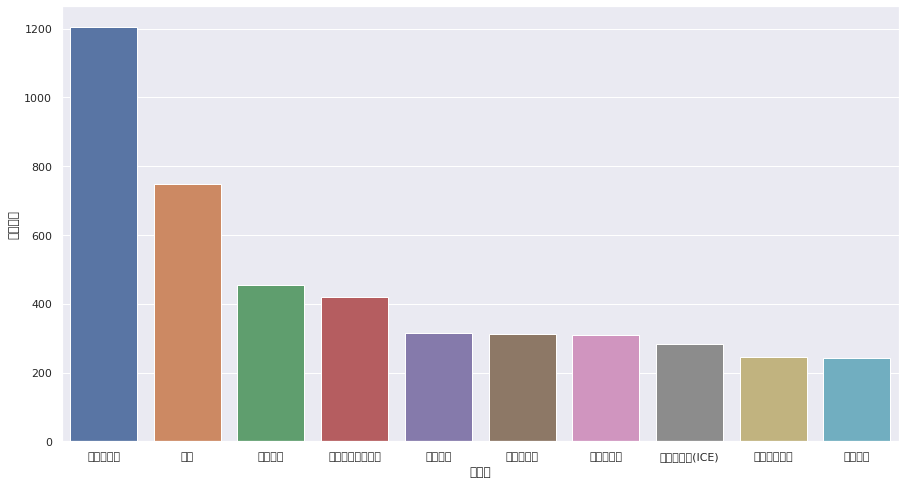

In [70]:
sns.barplot(data=top_goods.iloc[:10], x='상품명', y='상품개수')
plt.show()

In [72]:
temp_var

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,2022-04
...,...,...,...,...,...,...,...,...,...
7097,2021-02-17 13:48,선불기2,카페모카(HOT),현금,결제완료,1,4500,NaN,2021-02
7098,2021-02-17 13:50,선불기2,카페모카(HOT),현금,결제완료,1,4500,NaN,2021-02
7099,2021-02-17 13:46,카운터,아메리카노(HOT),현금,결제완료,1,3500,NaN,2021-02
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,4500,NaN,2021-02


/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44608 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 52824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48374 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48165 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 46972 missing from current font.
  font.set_

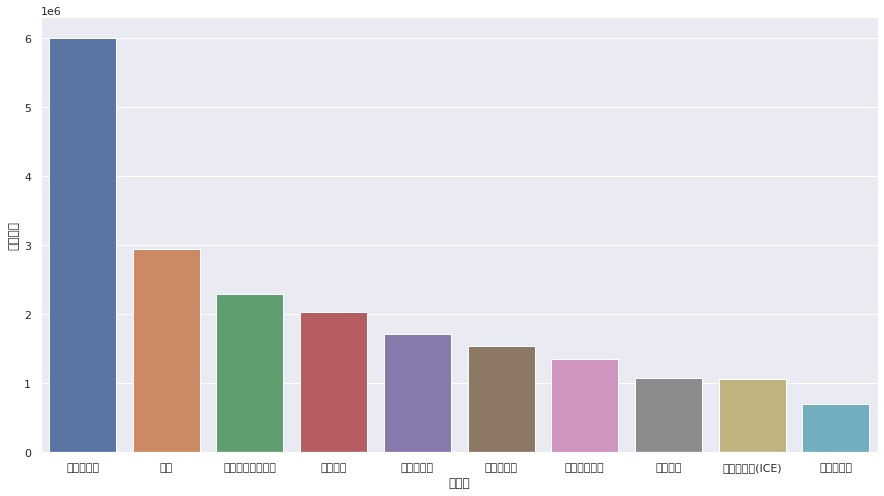

In [82]:
# 상품명 기준으로 결제금액 summation
grouped_goods = temp_var['결제금액'].groupby(temp_var['상품명']).sum().reset_index()

grouped_goods = grouped_goods.sort_values(by=['결제금액'], ascending=False)
grouped_goods.iloc[:10]

sns.barplot(data=grouped_goods.iloc[:10], x='상품명', y='결제금액')
plt.show()

필수 문제3: 가장 많이 팔린 입장권 종류(entry_data를 이용합니다.)

In [86]:
temp_var = entry_data
# 요금제명을 기준으로 금액 집계
temp_var = temp_var['금액'].groupby(temp_var['요금제명']).sum().reset_index()
temp_var = temp_var.sort_values(by=['금액'], ascending=False)
temp_var.iloc[:10]

,요금제명,금액
21,한국대생 입장권(종일권),70037000
17,입장권(종일권),23570500
15,심야-조조무제한(06시까지),11600000
14,심야-조조무제한,6221000
20,한국대생 무제한 입장권,5207500
11,시간요금제(1시간),2665500
13,시간요금제(3시간),2042000
5,무제한 입장권,1568600
0,18시이후 무제한,1330500
18,조조무제한,693000


/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_

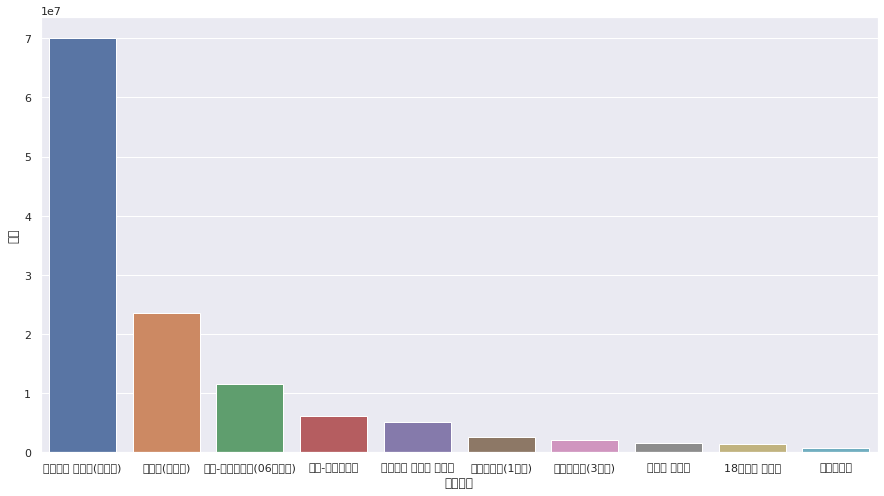

In [88]:
sns.barplot(data=temp_var.iloc[:10], x='요금제명', y='금액')
plt.show()

내가 정의한 문제 : 매장입장에서 김치는 편리한 반찬이다. 한 번 구비해놓으면 김치볶음밥도 만들 수 있고, 각 식사에도 김치하나면 반찬이 된다. 하지만 김치가 다 떨어지면 매장입장에서는 매우 난처하게 된다. 배추의 가격도 그다지 친절하지않으니, 배추의 가격에 맞춰 김치를 장만하는 전략을 짜놓으면 난처할 일이 안생길 것이다. 

각종 식사에는 반찬으로 김치가 평균 30g정도 제공되고, 김치볶음밥에는 90g의 김치가 소요된다. 그렇다면 적어도 소모되는 김치의 양의 평균의 양만큼 김치를 구비하여 난처한 상황을 피하는 것이 어떨까?

In [21]:
item_data.to_csv("item_data.csv", mode='w')